In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime as dt
import time
import emojis

In [2]:
def make_dict(x,state = 'language or source'):
    x = sort_dict(x)
    tmp = list(x)
    s = sum(list(x.values()))
    c = 0
    if state == 'players':
        for i in range(len(tmp)):
        
            if i>5  :
            
                c+=x[tmp[i]]
                del x[tmp[i]]
    
        x['other'] = c
    else:
        for i in range(len(tmp)):
        
            if i>7 or x[tmp[i]]<s * 0.08 :
            
                c+=x[tmp[i]]
                del x[tmp[i]]
    
        x['other'] = c
    return x

In [3]:
def sort_dict(x):
    sorted_dict= dict(sorted(x.items(), key = lambda kv: kv[1]))
    sorted_dict =dict(reversed(list(sorted_dict.items())))
    return sorted_dict

In [4]:
def make_plot(x,state='language or source'):
    
    x = make_dict(x,state)
    mylabels = list(x.keys())
    values = list(x.values())
    return_value = {'mylabels':mylabels,'values':values}
    return return_value

In [5]:
def top5_emojies(x):
    tmp = list(sort_dict(x))

    for i in range(len(tmp)):
        if i>4:
            
            del x[tmp[i]]
            
    return sort_dict(x)

In [6]:
def hashtage_set(st):

    st.pop(0)
    if 'psgbarca' in st: #remove '#barcapsg' from hashtags
        st.remove('psgbarca')
    if 'psgbarça' in st:
        st.remove('psgbarça')
    for i in st:
        if i not in hashtag:
            hashtag[i]=1
        else:
            hashtag[i]+=1
    return

In [7]:
def make_bar(hashtag_dict):
    hashtag_dict = sort_dict(hashtag_dict)
    
    x = list(hashtag_dict.keys())[0:5]
    y = list(hashtag_dict.values())[0:5]
    
    for i in range(0,5):
        x[i] = '#' + x[i]
       
    
    plt.bar(x, y,color = "#4CAF50")
    plt.title('Top 5 hashtags used in people tweets')
    plt.show()

In [8]:
#collecting barca and psg players
barca_players={'stegen':0,'mingueza':0,'piqu':0,'lengle':0,'busque':0,'dest':0,'alba':0,'jong':0,'pedri':0,'messi':0,'dembele':0}
psg_players = {'navas':0,'florenzi':0,'marquinhos':0,'kimpembe':0,'kurzawa':0,'paredes':0,'gueye':0,'verratti':0,'draxler':0,'mbapp':0,'Icardi':0,'angel':0}

In [9]:
#reading from csv file
df = pd.read_csv('recent_tweet.csv') 
df.columns =['id', 'text','lang','screen_name','created_at','media','hashtag','favorite_count','retweets_count','source']

In [10]:
#finding frequncy of languages in tweets
lang = {}
for i in df['lang']:
    if i not in lang:
        lang[i] = 0
for i in df['lang']:
    lang[i]+=1


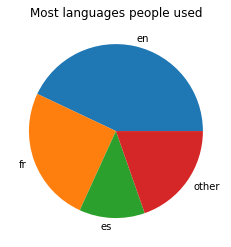

In [11]:
plot_lang = make_plot(lang)

plt.pie(plot_lang['values'], labels = plot_lang['mylabels'])
plt.title('Most languages people used')
plt.show()

In [12]:
source = {}
for i in df['source']:
    if i not in source:
        source[i] = 0
for i in df['source']:
    source[i]+=1


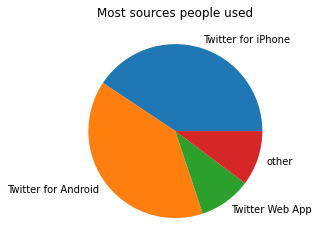

In [13]:
plot = make_plot(source,'asdf')

plt.pie(plot['values'], labels = plot['mylabels'])
plt.title('Most sources people used')
plt.show()

In [14]:
for text in df['text']:
    text = text.lower()
    for i in barca_players:
        if i in text:
            barca_players[i]+=1
    for i in psg_players:
        if i in text:
            psg_players[i]+=1

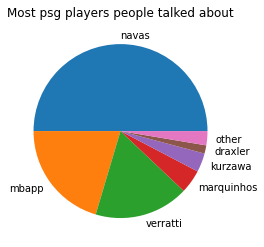

In [15]:
plot = make_plot(psg_players,'players')
plt.pie(plot['values'], labels = plot['mylabels'])
plt.title('Most psg players people talked about')
plt.show()

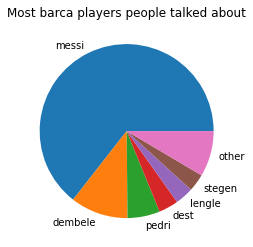

In [16]:
plot = make_plot(barca_players,'players')
plt.pie(plot['values'], labels = plot['mylabels'])
plt.title('Most barca players people talked about')
plt.show()

In [18]:
hashtag = {}
for text in df['hashtag']:
    if pd.isna(text)==False:
        text = text.lower()
        text = text.split('#')
        hashtage_set(text)

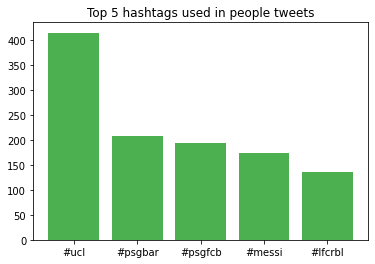

In [19]:
make_bar(hashtag)

In [20]:
#finding top 5 emojis used in people tweets
em = {}
for text in df['text']:
    tmp = list(emojis.get(text))
    
    for i in tmp:
            
            if i in em:
                em[i]+=1
            else:
                em[i]=1
                
em = top5_emojies(em)
print('emoji','frequency')
print()
for emoji_ in em:
    print(emoji_,em[emoji_])

emoji frequency

⚽ 159
🔴 144
💪 137
❤️ 123
🔵 105
